In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:/Users/RedCapital/Documents/analisisconpython/bases_de_datos/landing_Creditos.xlsx')
df.head()

,ID,Registro_completo,Nombre,RUT,RUT repetido,E-mail,E-mail repetido,Telefono,tipo_avaluo,valor_propiedad,...,valor_cuanta_deuda_tiene_propiedad,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,mts,Rechazo,Tipo de Rechazo,e-mail rechazo,Fecha
0,8461,1,Victor,18.012.884-0,no,vt2zamurai@gmail.com,no,55118781,Valor Comercial,50000000,...,peso,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,NaN,aprueba,NaN,sí,2022-10-01 22:43:13
1,8460,1,Carlos Alberto Ovando Mancilla,13.166.531-8,no,carlos_32ovando@hotmail.com,no,49442516,Valor Comercial,60000000,...,peso,Casa,Los Lagos,Puerto Montt,AVENIDA LOS ROBLES 1487 BOSQUEMAR,74 m2,aprueba,NaN,no,2022-10-01 19:51:46
2,8459,1,Oscar,24.766.445-9,no,og0458940@gmail.com,no,44689719,Valor Comercial,1650,...,peso,Casa,Antofagasta,Antofagasta,NaN,NaN,aprueba,NaN,no,2022-10-01 19:49:07
3,8458,1,fernando,180.056.769-,no,michelcortes406@gmail.com,no,99563335,Avalúo Fiscal,40000000,...,peso,Casa,Tarapacá,Pica,los mangos 27,NaN,aprueba,NaN,no,2022-10-01 18:04:17
4,8457,1,Diego Alejandro Gutierrez gutierrez,17.550.905-4,no,gutierrez.dillan@hotmail.com,no,56988916,Avalúo Fiscal,150000000000,...,peso,Agr,Los Ríos,Valdivia,Pasaje demmere Valdivia,NaN,aprueba,NaN,no,2022-10-01 12:37:10


## Limpieza de Inconsistencias

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3036 non-null   int64  
 1   Registro_completo                   3036 non-null   int64  
 2   Nombre                              3036 non-null   object 
 3   RUT                                 3036 non-null   object 
 4   RUT repetido                        3036 non-null   object 
 5   E-mail                              3036 non-null   object 
 6   E-mail repetido                     3036 non-null   object 
 7   Telefono                            3036 non-null   int64  
 8   tipo_avaluo                         3036 non-null   object 
 9   valor_propiedad                     3036 non-null   int64  
 10  valor_propiedad_valor               3036 non-null   object 
 11  monto_credito_socilitar             3036 no

In [4]:
df.drop("RUT repetido", axis=1, inplace=True)
df.drop("E-mail repetido", axis=1, inplace=True)
df.drop("tiene_credito_hipotecario_vigente", axis=1, inplace=True)
df.drop("cuanta_deuda_tiene_propiedad", axis=1, inplace=True)
df.drop("mts", axis=1, inplace=True)
df.drop("Tipo de Rechazo", axis=1, inplace=True)
df.drop("valor_cuanta_deuda_tiene_propiedad", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             3036 non-null   int64 
 1   Registro_completo              3036 non-null   int64 
 2   Nombre                         3036 non-null   object
 3   RUT                            3036 non-null   object
 4   E-mail                         3036 non-null   object
 5   Telefono                       3036 non-null   int64 
 6   tipo_avaluo                    3036 non-null   object
 7   valor_propiedad                3036 non-null   int64 
 8   valor_propiedad_valor          3036 non-null   object
 9   monto_credito_socilitar        3036 non-null   int64 
 10  valor_monto_credito_socilitar  2616 non-null   object
 11  tipo_de_propiedad              2362 non-null   object
 12  region_propiedad               2362 non-null   object
 13  com

In [6]:
df.shape

(3036, 18)

In [7]:
df.drop_duplicates("RUT", inplace=True)
df.drop_duplicates("E-mail", inplace=True)
df.drop_duplicates("Telefono", inplace=True)

In [8]:
df.shape

(2321, 18)

In [9]:
# 715 registros duplicados
3036-2321

715

In [10]:
# Que equivalen al 23,55% de todos los registros
((2321/3036)-1)*-100

23.550724637681164

In [11]:
df.sort_values("valor_propiedad", ascending=False).head(10)

,ID,Registro_completo,Nombre,RUT,E-mail,Telefono,tipo_avaluo,valor_propiedad,valor_propiedad_valor,monto_credito_socilitar,valor_monto_credito_socilitar,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha
243,8218,1,Pedro Adolfo Palma Obando,15.882.601-1,pedroadolfopalma2020@gmail.com,76152144,Valor Comercial,185000000000,peso,25000000,peso,Agr,Los Ríos,La Unión,Guenue chanculen,aprueba,no,2022-09-06 17:06:01
4,8457,1,Diego Alejandro Gutierrez gutierrez,17.550.905-4,gutierrez.dillan@hotmail.com,56988916,Avalúo Fiscal,150000000000,peso,80000000000,peso,Agr,Los Ríos,Valdivia,Pasaje demmere Valdivia,aprueba,no,2022-10-01 12:37:10
1010,7451,1,Xenia Valdivia videla,15.022.015-7,Dgodoy@hotmail.cl,40874213,Valor Comercial,100000000000,peso,20000000,peso,Casa,Antofagasta,Antofagasta,Roble 695,aprueba,no,2022-06-15 17:11:47
2413,6048,1,Heraldo alex armas tirado,14.679.069-0,alex_heraldo@hotmail.com,97514735,Avalúo Fiscal,80000000000,peso,550000000,peso,Casa,Metropolitana de Santiago,Santiago,Victor manuel,aprueba,no,2022-01-11 15:37:31
391,8070,1,Juan Pastene,11.756.381-2,juanpastene.s@hotmail.com,51697119,Avalúo Fiscal,30000000000,peso,5000000000,peso,Casa,Metropolitana de Santiago,Alhué,El Asientos/n,aprueba,no,2022-08-18 18:00:37
1858,6603,1,Evelyn labraña,13.942.674-6,evelynlabrana879@gmail.com,98333174,Avalúo Fiscal,26000000000,peso,15000000000,peso,Casa,Metropolitana de Santiago,Lampa,Libertad 2054 las Malvinas lampa,aprueba,no,2022-03-21 22:43:44
2553,5908,1,Katherine Cuevas,17.582.790-0,katherine.cuevasrubilar@gmail.com,64185905,Avalúo Fiscal,3000000000,peso,2500000000,peso,Terreno,La Araucanía,Temuco,NaN,aprueba,no,2021-12-22 01:05:20
2477,5984,1,JORGE CUEVAS,13.886.150-3,jcuevas@flowtech.cl,56199525,Valor Comercial,1700000000,peso,800000000,peso,Industrial,Metropolitana de Santiago,Macul,Las dalias 2693,aprueba,no,2022-01-04 12:44:50
2085,6376,1,Jorge esquivel,12.577.051-7,Empresasesquivel@gmail.com,77602540,Valor Comercial,1700000000,peso,1000000000,peso,Terreno,Atacama,Chañaral,NaN,aprueba,no,2022-02-17 13:45:10
1611,6850,1,Antonio ORELLANA,12.695.644-4,antonioorellana@hotmail.com,95663728,Valor Comercial,1600000000,peso,1000000000,peso,Agr,Metropolitana de Santiago,Calera de Tango,NaN,aprueba,no,2022-04-18 11:09:16


In [12]:
df.sort_values("monto_credito_socilitar", ascending=False).head(10)

,ID,Registro_completo,Nombre,RUT,E-mail,Telefono,tipo_avaluo,valor_propiedad,valor_propiedad_valor,monto_credito_socilitar,valor_monto_credito_socilitar,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha
4,8457,1,Diego Alejandro Gutierrez gutierrez,17.550.905-4,gutierrez.dillan@hotmail.com,56988916,Avalúo Fiscal,150000000000,peso,80000000000,peso,Agr,Los Ríos,Valdivia,Pasaje demmere Valdivia,aprueba,no,2022-10-01 12:37:10
2284,6177,0,Jocelyn rojas,17.064.420-4,jocelyn.rojas.venegas@gmail.com,86968642,Valor Comercial,40000000,peso,65000000000,peso,NaN,NaN,NaN,NaN,aprueba,no,2022-01-25 19:49:06
990,7471,1,Guido Soto,11.313.307-1,Sotoguido55@gmail.com,74481094,Valor Comercial,40000000,peso,25000000000,peso,Agr,Coquimbo,Salamanca,Quelen alto,aprueba,no,2022-06-16 19:53:03
1858,6603,1,Evelyn labraña,13.942.674-6,evelynlabrana879@gmail.com,98333174,Avalúo Fiscal,26000000000,peso,15000000000,peso,Casa,Metropolitana de Santiago,Lampa,Libertad 2054 las Malvinas lampa,aprueba,no,2022-03-21 22:43:44
391,8070,1,Juan Pastene,11.756.381-2,juanpastene.s@hotmail.com,51697119,Avalúo Fiscal,30000000000,peso,5000000000,peso,Casa,Metropolitana de Santiago,Alhué,El Asientos/n,aprueba,no,2022-08-18 18:00:37
1477,6984,1,Jorge Luis Alejandro Pérez Pérez,18.315.335-8,jorgeluis1993jorge@gmail.com,94464277,Avalúo Fiscal,35000000,peso,5000000000,peso,Casa,Arica y Parinacota,Arica,NaN,aprueba,no,2022-04-30 00:09:46
2553,5908,1,Katherine Cuevas,17.582.790-0,katherine.cuevasrubilar@gmail.com,64185905,Avalúo Fiscal,3000000000,peso,2500000000,peso,Terreno,La Araucanía,Temuco,NaN,aprueba,no,2021-12-22 01:05:20
718,7743,0,Miguel Peña,15.340.740-1,mpena@kokum.cl,58428750,Valor Comercial,1300000000,peso,1000000000,peso,NaN,NaN,NaN,NaN,aprueba,no,2022-07-18 11:03:55
1611,6850,1,Antonio ORELLANA,12.695.644-4,antonioorellana@hotmail.com,95663728,Valor Comercial,1600000000,peso,1000000000,peso,Agr,Metropolitana de Santiago,Calera de Tango,NaN,aprueba,no,2022-04-18 11:09:16
2085,6376,1,Jorge esquivel,12.577.051-7,Empresasesquivel@gmail.com,77602540,Valor Comercial,1700000000,peso,1000000000,peso,Terreno,Atacama,Chañaral,NaN,aprueba,no,2022-02-17 13:45:10


In [13]:
df = df[df["Registro_completo"] == 1]
df = df[df["valor_propiedad"] > 0]
df = df[df["valor_propiedad"] < 5000000000]
df = df[df["monto_credito_socilitar"] > 0]
df = df[df["monto_credito_socilitar"] < 5000000000]

In [14]:
df.shape

(1810, 18)

In [15]:
# 511 de 2321 son registros mal completados
2321-1810

511

In [16]:
# Que equivalen al 22% de los registrados
((1810/2321)-1)*-100

22.016372253339078

In [17]:
df["Fecha_2"] = df["Fecha"].str[0:10]

In [18]:
df.head()

,ID,Registro_completo,Nombre,RUT,E-mail,Telefono,tipo_avaluo,valor_propiedad,valor_propiedad_valor,monto_credito_socilitar,valor_monto_credito_socilitar,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha,Fecha_2
0,8461,1,Victor,18.012.884-0,vt2zamurai@gmail.com,55118781,Valor Comercial,50000000,peso,15000000,peso,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,aprueba,sí,2022-10-01 22:43:13,2022-10-01
1,8460,1,Carlos Alberto Ovando Mancilla,13.166.531-8,carlos_32ovando@hotmail.com,49442516,Valor Comercial,60000000,peso,10000000,peso,Casa,Los Lagos,Puerto Montt,AVENIDA LOS ROBLES 1487 BOSQUEMAR,aprueba,no,2022-10-01 19:51:46,2022-10-01
2,8459,1,Oscar,24.766.445-9,og0458940@gmail.com,44689719,Valor Comercial,1650,uf,50000000,peso,Casa,Antofagasta,Antofagasta,NaN,aprueba,no,2022-10-01 19:49:07,2022-10-01
3,8458,1,fernando,180.056.769-,michelcortes406@gmail.com,99563335,Avalúo Fiscal,40000000,peso,40000000,peso,Casa,Tarapacá,Pica,los mangos 27,aprueba,no,2022-10-01 18:04:17,2022-10-01
5,8456,1,Vian a,20.083.196-8,vianca_23__@Hotmail.com,41805363,Avalúo Fiscal,10000000,peso,3000000,peso,Casa,Arica y Parinacota,Arica,NaN,aprueba,no,2022-10-01 12:16:47,2022-10-01


In [19]:
df["Fecha_2"] = pd.to_datetime(df["Fecha_2"], errors= "coerce")

In [20]:
df.drop("Fecha", axis=1, inplace=True)
df.drop("Registro_completo", axis=1, inplace=True)

In [21]:
df.rename(columns={"Fecha_2":"Fecha"}, inplace=True)
df.rename(columns={"valor_propiedad_valor":"TipoMoneda_ValorPropiedad"}, inplace=True)
df.rename(columns={"valor_monto_credito_socilitar":"TipoMoneda_MontoSolicitado"}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 0 to 3035
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          1810 non-null   int64         
 1   Nombre                      1810 non-null   object        
 2   RUT                         1810 non-null   object        
 3   E-mail                      1810 non-null   object        
 4   Telefono                    1810 non-null   int64         
 5   tipo_avaluo                 1810 non-null   object        
 6   valor_propiedad             1810 non-null   int64         
 7   TipoMoneda_ValorPropiedad   1810 non-null   object        
 8   monto_credito_socilitar     1810 non-null   int64         
 9   TipoMoneda_MontoSolicitado  1810 non-null   object        
 10  tipo_de_propiedad           1810 non-null   object        
 11  region_propiedad            1810 non-null   object      

In [23]:
df.head()

,ID,Nombre,RUT,E-mail,Telefono,tipo_avaluo,valor_propiedad,TipoMoneda_ValorPropiedad,monto_credito_socilitar,TipoMoneda_MontoSolicitado,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha
0,8461,Victor,18.012.884-0,vt2zamurai@gmail.com,55118781,Valor Comercial,50000000,peso,15000000,peso,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,aprueba,sí,2022-10-01
1,8460,Carlos Alberto Ovando Mancilla,13.166.531-8,carlos_32ovando@hotmail.com,49442516,Valor Comercial,60000000,peso,10000000,peso,Casa,Los Lagos,Puerto Montt,AVENIDA LOS ROBLES 1487 BOSQUEMAR,aprueba,no,2022-10-01
2,8459,Oscar,24.766.445-9,og0458940@gmail.com,44689719,Valor Comercial,1650,uf,50000000,peso,Casa,Antofagasta,Antofagasta,NaN,aprueba,no,2022-10-01
3,8458,fernando,180.056.769-,michelcortes406@gmail.com,99563335,Avalúo Fiscal,40000000,peso,40000000,peso,Casa,Tarapacá,Pica,los mangos 27,aprueba,no,2022-10-01
5,8456,Vian a,20.083.196-8,vianca_23__@Hotmail.com,41805363,Avalúo Fiscal,10000000,peso,3000000,peso,Casa,Arica y Parinacota,Arica,NaN,aprueba,no,2022-10-01


## Limpieza Estadistica y Transformación

In [24]:
df["Valor de la propiedad"] = np.where(df["TipoMoneda_ValorPropiedad"] == "peso", (df["valor_propiedad"] / 34000), (df["valor_propiedad"] * 1))
df["Monto solicitado"] = np.where(df["TipoMoneda_MontoSolicitado"] == "peso", (df["monto_credito_socilitar"] / 34000), (df["monto_credito_socilitar"] * 1))

In [25]:
df.drop("valor_propiedad", axis=1, inplace=True)
df.drop("monto_credito_socilitar", axis=1, inplace=True)
df.drop("TipoMoneda_ValorPropiedad", axis=1, inplace=True)
df.drop("TipoMoneda_MontoSolicitado", axis=1, inplace=True)

In [26]:
df.head()

,ID,Nombre,RUT,E-mail,Telefono,tipo_avaluo,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha,Valor de la propiedad,Monto solicitado
0,8461,Victor,18.012.884-0,vt2zamurai@gmail.com,55118781,Valor Comercial,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,aprueba,sí,2022-10-01,1470.588235,441.176471
1,8460,Carlos Alberto Ovando Mancilla,13.166.531-8,carlos_32ovando@hotmail.com,49442516,Valor Comercial,Casa,Los Lagos,Puerto Montt,AVENIDA LOS ROBLES 1487 BOSQUEMAR,aprueba,no,2022-10-01,1764.705882,294.117647
2,8459,Oscar,24.766.445-9,og0458940@gmail.com,44689719,Valor Comercial,Casa,Antofagasta,Antofagasta,NaN,aprueba,no,2022-10-01,1650.000000,1470.588235
3,8458,fernando,180.056.769-,michelcortes406@gmail.com,99563335,Avalúo Fiscal,Casa,Tarapacá,Pica,los mangos 27,aprueba,no,2022-10-01,1176.470588,1176.470588
5,8456,Vian a,20.083.196-8,vianca_23__@Hotmail.com,41805363,Avalúo Fiscal,Casa,Arica y Parinacota,Arica,NaN,aprueba,no,2022-10-01,294.117647,88.235294


In [27]:
df["Valor_de_la_propiedad"] = df["Valor de la propiedad"].apply(np.ceil)
df["Monto_solicitado"] = df["Monto solicitado"].apply(np.ceil)

In [28]:
df = df[["ID","Nombre","RUT","E-mail","Telefono","tipo_avaluo","Valor_de_la_propiedad","Monto_solicitado","tipo_de_propiedad","region_propiedad","comuna_propiedad","direccion_propiedad","Rechazo","e-mail rechazo","Fecha"]]
df.head()

,ID,Nombre,RUT,E-mail,Telefono,tipo_avaluo,Valor_de_la_propiedad,Monto_solicitado,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha
0,8461,Victor,18.012.884-0,vt2zamurai@gmail.com,55118781,Valor Comercial,1471.0,442.0,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,aprueba,sí,2022-10-01
1,8460,Carlos Alberto Ovando Mancilla,13.166.531-8,carlos_32ovando@hotmail.com,49442516,Valor Comercial,1765.0,295.0,Casa,Los Lagos,Puerto Montt,AVENIDA LOS ROBLES 1487 BOSQUEMAR,aprueba,no,2022-10-01
2,8459,Oscar,24.766.445-9,og0458940@gmail.com,44689719,Valor Comercial,1650.0,1471.0,Casa,Antofagasta,Antofagasta,NaN,aprueba,no,2022-10-01
3,8458,fernando,180.056.769-,michelcortes406@gmail.com,99563335,Avalúo Fiscal,1177.0,1177.0,Casa,Tarapacá,Pica,los mangos 27,aprueba,no,2022-10-01
5,8456,Vian a,20.083.196-8,vianca_23__@Hotmail.com,41805363,Avalúo Fiscal,295.0,89.0,Casa,Arica y Parinacota,Arica,NaN,aprueba,no,2022-10-01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 0 to 3035
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1810 non-null   int64         
 1   Nombre                 1810 non-null   object        
 2   RUT                    1810 non-null   object        
 3   E-mail                 1810 non-null   object        
 4   Telefono               1810 non-null   int64         
 5   tipo_avaluo            1810 non-null   object        
 6   Valor_de_la_propiedad  1810 non-null   float64       
 7   Monto_solicitado       1810 non-null   float64       
 8   tipo_de_propiedad      1810 non-null   object        
 9   region_propiedad       1810 non-null   object        
 10  comuna_propiedad       1810 non-null   object        
 11  direccion_propiedad    1085 non-null   object        
 12  Rechazo                1810 non-null   object        
 13  e-m

In [30]:
df.sort_values("Valor_de_la_propiedad", ascending=False).head()

,ID,Nombre,RUT,E-mail,Telefono,tipo_avaluo,Valor_de_la_propiedad,Monto_solicitado,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha
1215,7246,Veronica soledad,12.579.217-0,patriciovelizlopez@gmail.com,94623141,Avalúo Fiscal,400000000.0,148.0,Casa,Valparaiso,Los Andes,Uspallara 1580 los andes,aprueba,no,2022-05-26
1066,7395,Marcelo amador hernandez romero,14.459.533-5,marcelo6859@gmail.com,4643311,Valor Comercial,75000000.0,442.0,Casa,Metropolitana de Santiago,Puente Alto,Pasaje volcan olca,aprueba,sí,2022-06-12
2379,6082,Claudia San Jorge,15.638.771-1,clausanjorge@gmail.com,57124686,Avalúo Fiscal,70000000.0,589.0,Casa,Metropolitana de Santiago,Santiago,NaN,aprueba,sí,2022-01-14
2590,5871,luis Felipe santander vivanco,18.163.220-8,satanderfelipe98@gmail.com,94652204,Valor Comercial,60000000.0,1324.0,Casa,Valparaiso,San Antonio,lago rapel llolleo,aprueba,no,2021-12-13
1986,6475,Victor manuel carrasco garcia,15.791.494-4,victormaquinaria1984@gmail.com,59720504,Valor Comercial,60000000.0,30000000.0,Casa,Metropolitana de Santiago,La Pintana,Pasaje la colonia 10918,aprueba,no,2022-03-03


In [31]:
df = df[df["Valor_de_la_propiedad"] < 1000100.0]
df = df[df["Valor_de_la_propiedad"] > 1470.0]
df = df[df["Monto_solicitado"] < 73530.0]
df = df[df["Monto_solicitado"] > 352.0]

In [32]:
df.shape

(824, 15)

In [33]:
df["LTV"] = df["Monto_solicitado"]/df["Valor_de_la_propiedad"]
df.head()

,ID,Nombre,RUT,E-mail,Telefono,tipo_avaluo,Valor_de_la_propiedad,Monto_solicitado,tipo_de_propiedad,region_propiedad,comuna_propiedad,direccion_propiedad,Rechazo,e-mail rechazo,Fecha,LTV
0,8461,Victor,18.012.884-0,vt2zamurai@gmail.com,55118781,Valor Comercial,1471.0,442.0,Casa,Metropolitana de Santiago,San Bernardo,Mulato Gil de Castro 127,aprueba,sí,2022-10-01,0.300476
2,8459,Oscar,24.766.445-9,og0458940@gmail.com,44689719,Valor Comercial,1650.0,1471.0,Casa,Antofagasta,Antofagasta,NaN,aprueba,no,2022-10-01,0.891515
7,8454,Mauricio Zapata,15.219.588-5,mauzapat@gmail.com,98376109,Valor Comercial,4412.0,2942.0,Casa,La Araucanía,Villarrica,NaN,aprueba,no,2022-09-30,0.666818
8,8453,David Valdes,18.977.214-9,drax.dvl@gmail.com,61777325,Valor Comercial,1765.0,500.0,Casa,Metropolitana de Santiago,San Bernardo,NaN,aprueba,sí,2022-09-30,0.283286
9,8452,edison maldonado,13.695.829-1,edisonmaldonado.m@gmail.com,98942759,Valor Comercial,3500.0,2942.0,Casa,Metropolitana de Santiago,La Florida,Walker Martinez 3577 N,aprueba,sí,2022-09-30,0.840571


## Visualización de datos

In [34]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [35]:
plt.style.use("tableau-colorblind10")

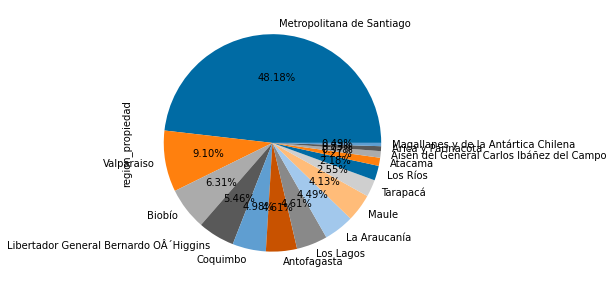

In [59]:
df["region_propiedad"].value_counts().plot(kind = "pie", autopct = "%.2f%%")

fig = plt.gcf()
fig.set_size_inches(10, 5)

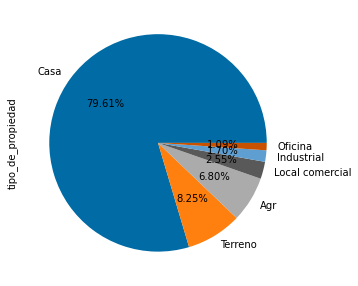

In [60]:
df["tipo_de_propiedad"].value_counts().plot(kind = "pie", autopct = "%.2f%%")

fig = plt.gcf()
fig.set_size_inches(10, 5)

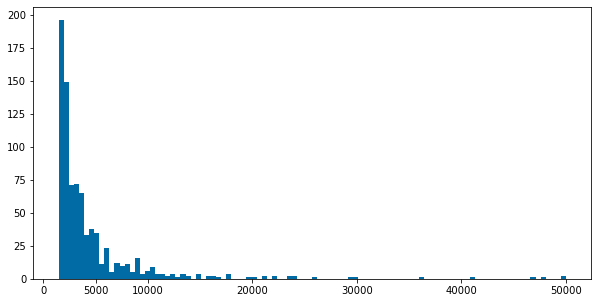

In [61]:
plt.hist(df["Valor_de_la_propiedad"], bins=100)

plt.xticks([0, 5000, 10000, 20000, 30000, 40000, 50000])

fig = plt.gcf()
fig.set_size_inches(10, 5)

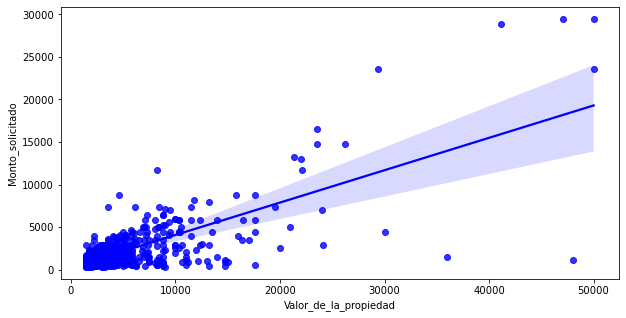

In [62]:
sns.regplot(data=df, x="Valor_de_la_propiedad", y="Monto_solicitado", scatter=True, color="blue", order=1)

fig = plt.gcf()
fig.set_size_inches(10, 5)

In [40]:
df_filtrado = df[(df["Valor_de_la_propiedad"] > 4500) & (df["Valor_de_la_propiedad"] < 20000)]
df_filtrado.shape

(194, 16)

In [41]:
df_filtrado_2 = df_filtrado[(df_filtrado["LTV"] > 0.3) & (df_filtrado["LTV"] < 0.75)]
df_filtrado_2.shape

(98, 16)

In [42]:
98/3036

0.032279314888010543

In [43]:
3036/98

30.979591836734695

In [44]:
df_filtrado["LTV"].agg("median")

0.3514957504674486

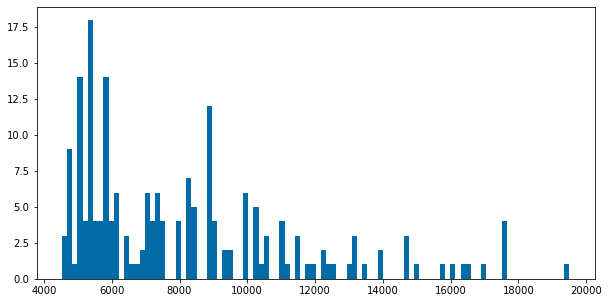

In [69]:
plt.hist(df_filtrado["Valor_de_la_propiedad"], bins=98)

fig = plt.gcf()
fig.set_size_inches(10, 5)

In [46]:
#¿cuanto de todos los casos nos sirven? ¿cuanto es la tasa de llamadas?
#¿cuanto es el promedio de ltv?
#¿cuanto es el promedio del ticket que nos llegan? ###
#¿como evolucionan los tiquet durante el tiempo?

#cual es la tasa de clientes que nos sirven de los clientes que se inscriben correctamente
#cual es la tasa de clientes que nos sirven de la base de datos completa

#de 5000 a 20000. SIMPLEMENTE HACER LA FILTRACION Y SACAR EL RATIO

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

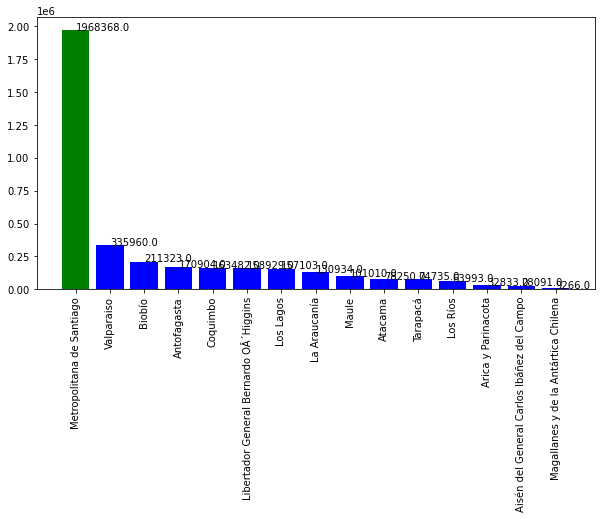

In [63]:
#comparacion
df_rp_vp_sum = df.groupby(["region_propiedad"])["Valor_de_la_propiedad"].agg("sum")
df_rp_vp_sum = pd.DataFrame(data=df_rp_vp_sum)
df_rp_vp_sum = df_rp_vp_sum.reset_index()
df_rp_vp_sum.sort_values("Valor_de_la_propiedad", ascending=False, inplace=True)

plt.bar(df_rp_vp_sum["region_propiedad"], df_rp_vp_sum["Valor_de_la_propiedad"], color=[
    "green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"])
plt.title=("Suma acumulada del valor de las propiedades dejadas en garantias por región")
plt.xlabel=("Región")
plt.ylabel=("Suma acumulada de las Propiedades")
for i in range(0,15):
    plt.annotate(df_rp_vp_sum["Valor_de_la_propiedad"][i],(df_rp_vp_sum["region_propiedad"][i], df_rp_vp_sum["Valor_de_la_propiedad"][i]))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xticks(rotation="vertical")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

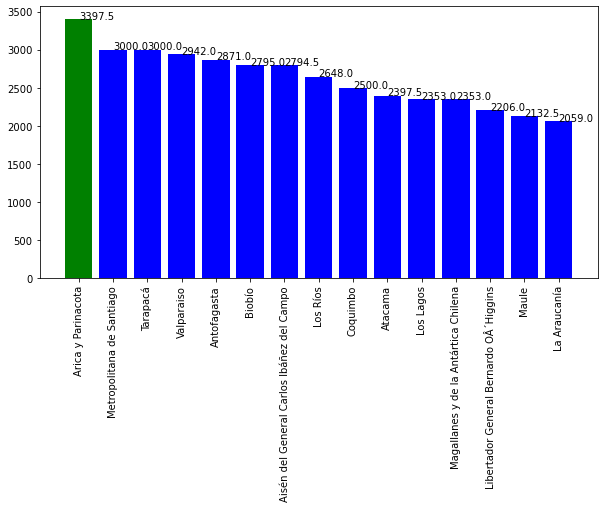

In [64]:
df_rp_vp_median = df.groupby(["region_propiedad"])["Valor_de_la_propiedad"].agg("median")
df_rp_vp_median = pd.DataFrame(data=df_rp_vp_median)
df_rp_vp_median = df_rp_vp_median.reset_index()
df_rp_vp_median.sort_values("Valor_de_la_propiedad", ascending=False, inplace=True)


plt.bar(df_rp_vp_median["region_propiedad"], df_rp_vp_median["Valor_de_la_propiedad"], color=[
    "green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"])

for i in range(0,15):
    plt.annotate(df_rp_vp_median["Valor_de_la_propiedad"][i],(df_rp_vp_median["region_propiedad"][i], df_rp_vp_median["Valor_de_la_propiedad"][i]))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xticks(rotation="vertical")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

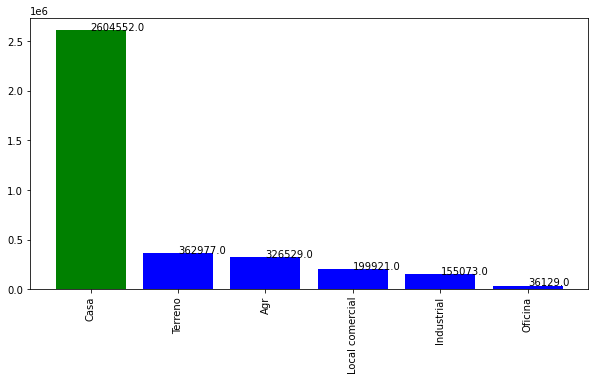

In [65]:
df_tp_vp_sum = df.groupby(["tipo_de_propiedad"])["Valor_de_la_propiedad"].agg("sum")
df_tp_vp_sum = pd.DataFrame(data=df_tp_vp_sum)
df_tp_vp_sum = df_tp_vp_sum.reset_index()
df_tp_vp_sum.sort_values("Valor_de_la_propiedad", ascending=False, inplace=True)

plt.bar(df_tp_vp_sum["tipo_de_propiedad"], df_tp_vp_sum["Valor_de_la_propiedad"], color=[
    "green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"])

for i in range(0,6):
    plt.annotate(df_tp_vp_sum["Valor_de_la_propiedad"][i],(df_tp_vp_sum["tipo_de_propiedad"][i], df_tp_vp_sum["Valor_de_la_propiedad"][i]))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xticks(rotation="vertical")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

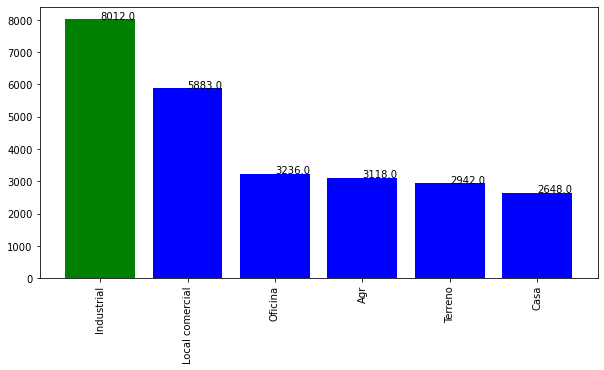

In [66]:
df_tp_vp_median = df.groupby(["tipo_de_propiedad"])["Valor_de_la_propiedad"].agg("median")
df_tp_vp_median = pd.DataFrame(data=df_tp_vp_median)
df_tp_vp_median = df_tp_vp_median.reset_index()
df_tp_vp_median.sort_values("Valor_de_la_propiedad", ascending=False, inplace=True)

plt.bar(df_tp_vp_median["tipo_de_propiedad"], df_tp_vp_median["Valor_de_la_propiedad"], color=[
    "green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"])

for i in range(0,6):
    plt.annotate(df_tp_vp_median["Valor_de_la_propiedad"][i],(df_tp_vp_median["tipo_de_propiedad"][i], df_tp_vp_median["Valor_de_la_propiedad"][i]))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xticks(rotation="vertical")

([<matplotlib.axis.YTick at 0x1929dc64d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

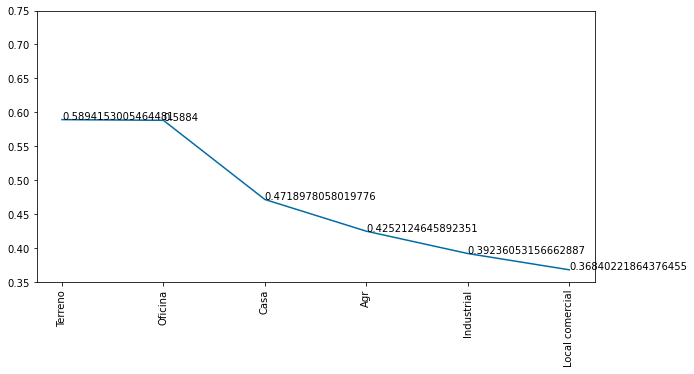

In [67]:
df_tp_ltv_median = df.groupby(["tipo_de_propiedad"])["LTV"].agg("median")
df_tp_ltv_median = pd.DataFrame(data=df_tp_ltv_median)
df_tp_ltv_median = df_tp_ltv_median.reset_index()
df_tp_ltv_median.sort_values("LTV", ascending=False, inplace=True)

plt.plot(df_tp_ltv_median["tipo_de_propiedad"], df_tp_ltv_median["LTV"])

for i in range(0,6):
    plt.annotate(df_tp_ltv_median["LTV"][i],(df_tp_ltv_median["tipo_de_propiedad"][i], df_tp_ltv_median["LTV"][i]))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xticks(rotation="vertical")
plt.yticks([0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])

In [52]:
df["LTV"].agg("median")

0.4772415795586527